<a href="https://colab.research.google.com/github/aiformankind/covid-19-hackathon/blob/master/Covid_19_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [122]:
!head -5 COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990
Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414
Chongqing,Mainland China,30.0572,107.874,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576
Fujian,Mainland China,26.0789,117.98

In [123]:
!head -5 COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv

﻿Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020
Confirmed,Globally,,282,314,581,846,1320,2014,2798,4593,6065,7818,9826,11953,14557,17391,20630,24554,28276,31481,34886,37558,40554,43103,45171,46997,49053,50580,51857,71429,73332,75204,75748,76769,77794,78811,79331
Confirmed,Mainland China,Western Pacific Region,278,309,571,830,1297,1985,2741,4537,5997,7736,9720,11821,14411,17238,20471,24363,28060,31211,34598,37251,40235,42708,44730,46550,48548,50054,51174,70635,72528,74280,74675,75569,76392,77042,77262
Confirmed,Outside of China,,4,5,10,16,23,29,57,56,68,82,106,132,146,153,159,191,216,270,288,307,319,395,441,447,505,526,683,794,804,924,1073,1200,1402,1769,20

In [124]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

In [125]:
covid_across_countries_df = pd.read_csv('COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv', skiprows=0)
covid_across_countries_df.head(10)

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,4593.0,6065.0,7818.0,9826.0,11953.0,14557.0,17391.0,20630.0,24554.0,28276.0,31481.0,34886.0,37558.0,40554.0,43103.0,45171.0,46997.0,49053.0,50580.0,51857.0,71429.0,73332.0,75204.0,75748.0,76769.0,77794.0,78811.0,79331.0
1,Confirmed,Mainland China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,7736.0,9720.0,11821.0,14411.0,17238.0,20471.0,24363.0,28060.0,31211.0,34598.0,37251.0,40235.0,42708.0,44730.0,46550.0,48548.0,50054.0,51174.0,70635.0,72528.0,74280.0,74675.0,75569.0,76392.0,77042.0,77262.0
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,56.0,68.0,82.0,106.0,132.0,146.0,153.0,159.0,191.0,216.0,270.0,288.0,307.0,319.0,395.0,441.0,447.0,505.0,526.0,683.0,794.0,804.0,924.0,1073.0,1200.0,1402.0,1769.0,2069.0
3,Suspected,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,5794.0,6973.0,9239.0,12167.0,15238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Severe,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,461.0,976.0,1239.0,1370.0,1527.0,1795.0,2110.0,2296.0,2788.0,3219.0,3859.0,4821.0,6101.0,6188.0,6484.0,7333.0,8204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Deaths,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,106.0,132.0,170.0,213.0,259.0,304.0,361.0,425.0,491.0,564.0,637.0,723.0,812.0,909.0,1017.0,1114.0,1260.0,1381.0,1524.0,1666.0,1772.0,1870.0,2006.0,2121.0,2239.0,2348.0,2445.0,2595.0
6,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7153.0,9074.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,34874.0,51968.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,66262.0,63454.0,64084.0,64287.0
7,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,604.0,683.0,797.0,870.0,944.0,1018.0,1075.0,1120.0,1151.0,1177.0,1219.0,1241.0,1261.0,1295.0,1316.0,1322.0,1328.0,1331.0,1332.0,1333.0,1339.0,1342.0,1345.0
8,Beijing,China,Western Pacific Region,5.0,5.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,183.0,212.0,228.0,253.0,274.0,297.0,315.0,326.0,337.0,342.0,352.0,366.0,372.0,375.0,380.0,381.0,387.0,393.0,395.0,396.0,399.0,399.0,399.0
9,Shanghai,China,Western Pacific Region,1.0,2.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.0,177.0,193.0,208.0,233.0,254.0,269.0,281.0,292.0,295.0,302.0,306.0,313.0,318.0,326.0,328.0,331.0,333.0,333.0,333.0,334.0,334.0,335.0,335.0


In [126]:
global_timeseries = covid_across_countries_df.iloc[0].iloc[3:]
global_timeseries.head(5)

1/21/2020     282
1/22/2020     314
1/23/2020     581
1/24/2020     846
1/25/2020    1320
Name: 0, dtype: object

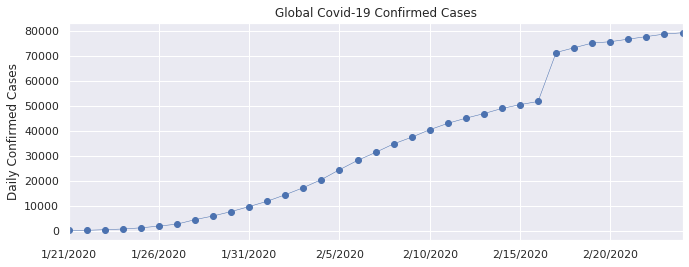

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries.plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('Global Covid-19 Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases');

In [128]:
global_timeseries = covid_across_countries_df.iloc[:2].T.iloc[3:]
global_timeseries.head(5)

,0,1
1/21/2020,282,278
1/22/2020,314,309
1/23/2020,581,571
1/24/2020,846,830
1/25/2020,1320,1297


In [129]:
#pd.to_datetime(global_timeseries.iloc[:,0])
global_timeseries['global']=global_timeseries.iloc[:,0]
global_timeseries['USA']=global_timeseries.iloc[:,1]
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.head(5)


,global,USA
1/21/2020,282,278
1/22/2020,314,309
1/23/2020,581,571
1/24/2020,846,830
1/25/2020,1320,1297


In [130]:
global_timeseries.index = pd.to_datetime(global_timeseries.index)
global_timeseries.head(5)

,global,USA
2020-01-21,282,278
2020-01-22,314,309
2020-01-23,581,571
2020-01-24,846,830
2020-01-25,1320,1297


Text(0, 0.5, 'Daily Confirmed Cases')

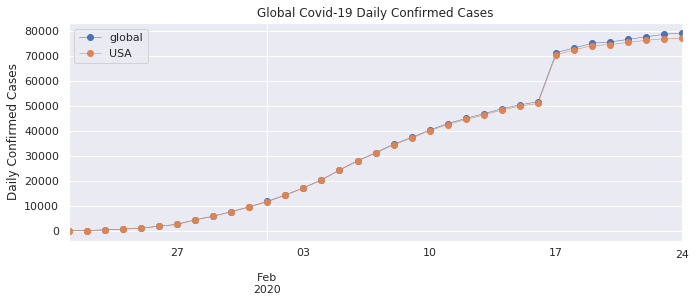

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()

cols = ['global', 'USA']
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries[cols].plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('Global Covid-19 Daily Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases')
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [132]:
global_timeseries['year'] = global_timeseries.index.year
global_timeseries['month'] = global_timeseries.index.month
global_timeseries['weekday'] = global_timeseries.index.weekday_name
global_timeseries.head(5)

,global,USA,year,month,weekday
2020-01-21,282,278,2020,1,Tuesday
2020-01-22,314,309,2020,1,Wednesday
2020-01-23,581,571,2020,1,Thursday
2020-01-24,846,830,2020,1,Friday
2020-01-25,1320,1297,2020,1,Saturday


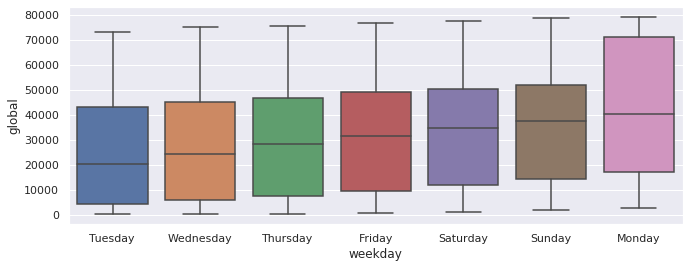

In [133]:
sns.boxplot(data=global_timeseries, x='weekday', y='global')

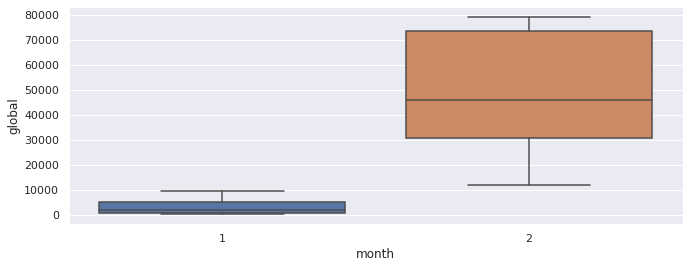

In [134]:
sns.boxplot(data=global_timeseries, x='month', y='global');

In [135]:
global_timeseries.head(10)

,global,USA,year,month,weekday
2020-01-21,282,278,2020,1,Tuesday
2020-01-22,314,309,2020,1,Wednesday
2020-01-23,581,571,2020,1,Thursday
2020-01-24,846,830,2020,1,Friday
2020-01-25,1320,1297,2020,1,Saturday
2020-01-26,2014,1985,2020,1,Sunday
2020-01-27,2798,2741,2020,1,Monday
2020-01-28,4593,4537,2020,1,Tuesday
2020-01-29,6065,5997,2020,1,Wednesday
2020-01-30,7818,7736,2020,1,Thursday


In [136]:
global_timeseries['date'] = global_timeseries.index.to_frame(index=True)
global_timeseries.head(10)

,global,USA,year,month,weekday,date
2020-01-21,282,278,2020,1,Tuesday,2020-01-21
2020-01-22,314,309,2020,1,Wednesday,2020-01-22
2020-01-23,581,571,2020,1,Thursday,2020-01-23
2020-01-24,846,830,2020,1,Friday,2020-01-24
2020-01-25,1320,1297,2020,1,Saturday,2020-01-25
2020-01-26,2014,1985,2020,1,Sunday,2020-01-26
2020-01-27,2798,2741,2020,1,Monday,2020-01-27
2020-01-28,4593,4537,2020,1,Tuesday,2020-01-28
2020-01-29,6065,5997,2020,1,Wednesday,2020-01-29
2020-01-30,7818,7736,2020,1,Thursday,2020-01-30


In [137]:
global_data = global_timeseries.rename(columns={'date': 'ds', 'global': 'y'})
global_data.head(5)


,y,USA,year,month,weekday,ds
2020-01-21,282,278,2020,1,Tuesday,2020-01-21
2020-01-22,314,309,2020,1,Wednesday,2020-01-22
2020-01-23,581,571,2020,1,Thursday,2020-01-23
2020-01-24,846,830,2020,1,Friday,2020-01-24
2020-01-25,1320,1297,2020,1,Saturday,2020-01-25


In [138]:
import fbprophet
global_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
global_prophet.fit(global_data)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
global_forecast = global_prophet.make_future_dataframe(periods=365 * 2, freq='D')
global_forecast = global_prophet.predict(global_forecast)

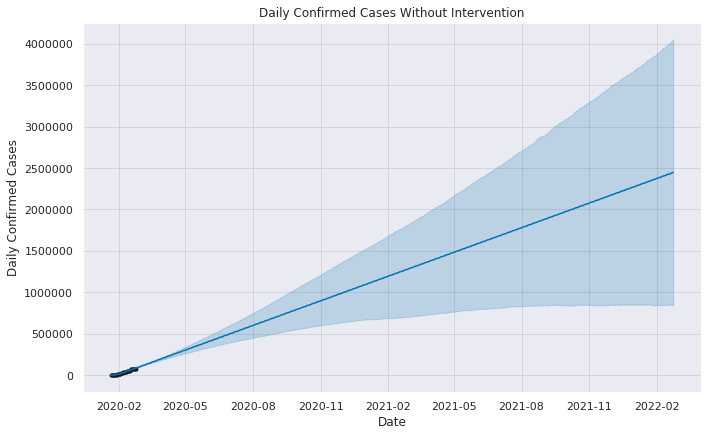

In [140]:
global_prophet.plot(global_forecast, xlabel = 'Date', ylabel = 'Daily Confirmed Cases')
plt.title('Daily Confirmed Cases Without Intervention');

In [141]:
global_prophet.changepoints[:10]

1    2020-01-22
2    2020-01-23
3    2020-01-24
4    2020-01-25
5    2020-01-26
6    2020-01-27
8    2020-01-29
9    2020-01-30
10   2020-01-31
11   2020-02-01
Name: ds, dtype: datetime64[ns]